In [1]:
%pylab inline
import numpy as np 

"""
This simulation is referenced in the paper in place of a more thorough grid test.  Mean and std of Cd and Cl 
are within a few percent and qualitative behavior are similar.  Fine simulation uses 14,144 elements of order 
7 and uses a more densely sampled set of points to define the boundary of the airfoil (1000 on top and bottom 
rather than 200).  A variable timestep was also used.  Fine simulation was run on 128 cores for 5 hours and 
timed out at t = 89.1845.  After the first 10 time uits (where Cd and Cl are nearly identical), mean values of 
Cd and Cl are within 0.396% and 2.794%.  Standard deviations are within 3.248% and 2.357%.
"""

Populating the interactive namespace from numpy and matplotlib


'\nThis simulation is referenced in the paper in place of a more thorough grid test.  Mean and std of Cd and Cl \nare within a few percent and qualitative behavior are similar.  Fine simulation uses 14,144 elements of order \n7 and uses a more densely sampled set of points to define the boundary of the airfoil (1000 on top and bottom \nrather than 200).  A variable timestep was also used.  Fine simulation was run on 128 cores for 5 hours and \ntimed out at t = 89.1845.  After the first 10 time uits (where Cd and Cl are nearly identical), mean values of \nCd and Cl are within 0.396% and 2.794%.  Standard deviations are within 3.248% and 2.357%.\n'

In [2]:
fine_force_file = './forceCoeffs.dat'
coarse_force_file = '../Airfoil_EE/Re_17500/forceCoeffs.dat'

fine_force = np.genfromtxt(fine_force_file)[1000:,:]     # Aerodynamic forces from fine grid
coarse_force = np.genfromtxt(coarse_force_file)[1000:,:]  # Aerodynamic forces from coarse grid

ind_max = np.min(np.where(coarse_force[:,0] > fine_force[-1,0]))
print(np.max(fine_force[:,0]))

89.1845


(1.0, 89.1845)

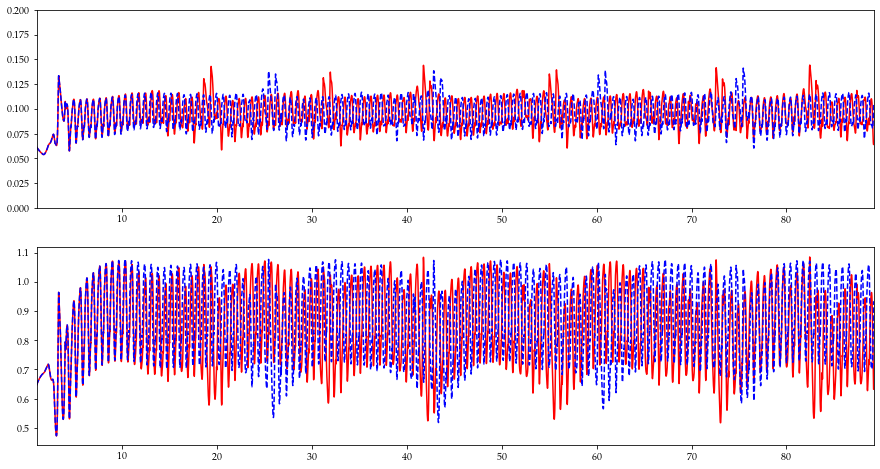

In [3]:
figure(figsize = (15,8))

tmin = 1
tmax = np.max(fine_force[:,0])

subplot(2,1,1)
plot(fine_force[:,0], fine_force[:,1], 'r')
plot(coarse_force[:,0], coarse_force[:,1], 'b--')
xlim([fine_force[0,0], fine_force[-1,0]])
ylim([0,0.2])
xlim([tmin,tmax])

subplot(2,1,2)
plot(fine_force[:,0], fine_force[:,2], 'r')
plot(coarse_force[:,0], coarse_force[:,2], 'b--')
xlim([fine_force[0,0], fine_force[-1,0]])
xlim([fine_force[0,0],tmax])
xlim([tmin,tmax])

In [4]:
def weights_mean_std(fine,coarse,j,min_time=10,max_time=None):
    
    min_ind_fine = np.min(np.where(fine[:,0]>min_time)[0])
    min_ind_coarse = np.min(np.where(coarse[:,0]>min_time)[0])
    
    if max_time is None:
        max_ind_fine = fine.shape[0]
        max_ind_coarse = np.max(np.where(coarse[:,0]<=np.max(fine[:,0]))[0])+1
    else:
        max_ind_fine = np.max(np.where(fine[:,0]<=max_time)[0])+1
        max_ind_coarse = np.max(np.where(coarse[:,0]<=max_time)[0])+1
        
    # Weight by timestep length
    dt = fine[min_ind_fine:max_ind_fine,0] - fine[min_ind_fine-1:max_ind_fine-1,0]
    fine_mean = np.sum(fine[min_ind_fine:max_ind_fine,j]*dt)/np.sum(dt)
    fine_std = np.sqrt(np.sum((fine[min_ind_fine:max_ind_fine,j]-fine_mean)**2*dt)/np.sum(dt))
    
    coarse_mean = np.mean(coarse[min_ind_coarse:max_ind_coarse,j]) # timesteps are constant
    coarse_std = np.std(coarse[min_ind_coarse:max_ind_coarse,j])
    
    err_mean = 100*np.abs(fine_mean-coarse_mean)/fine_mean
    err_std = 100*np.abs(fine_std-coarse_std)/fine_std
    
    print('Mean (fine/coarse/pct_diff):',np.round(fine_mean,5), np.round(coarse_mean,5), np.round(err_mean,3))
    print('Std  (fine/coarse/pct diff):',np.round(fine_std,5), np.round(coarse_std,5), np.round(err_std,3))

In [5]:
print('Drag coefficient')
weights_mean_std(fine_force, coarse_force,1,1)
print('\nLift coefficient')
weights_mean_std(fine_force, coarse_force,2)
print('\nTorque')
weights_mean_std(fine_force, coarse_force,3)

Drag coefficient
Mean (fine/coarse/pct_diff): 0.0957 0.09532 0.396
Std  (fine/coarse/pct diff): 0.0155 0.015 3.248

Lift coefficient
Mean (fine/coarse/pct_diff): 0.84936 0.87309 2.794
Std  (fine/coarse/pct diff): 0.134 0.13084 2.357

Torque
Mean (fine/coarse/pct_diff): 0.15454 0.15823 2.391
Std  (fine/coarse/pct diff): 0.05611 0.05525 1.54
